In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_moons
from sklearn.cluster import KMeans

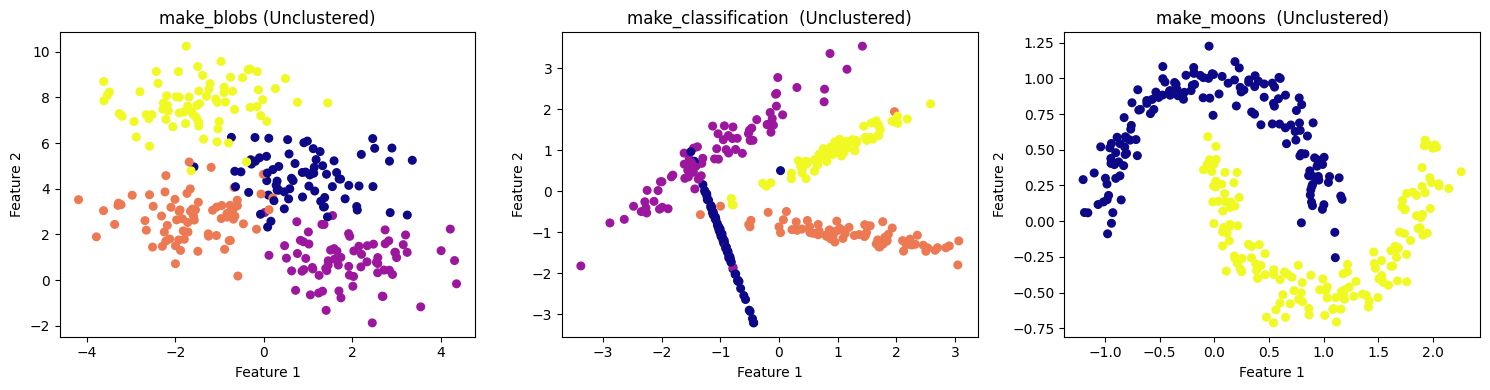

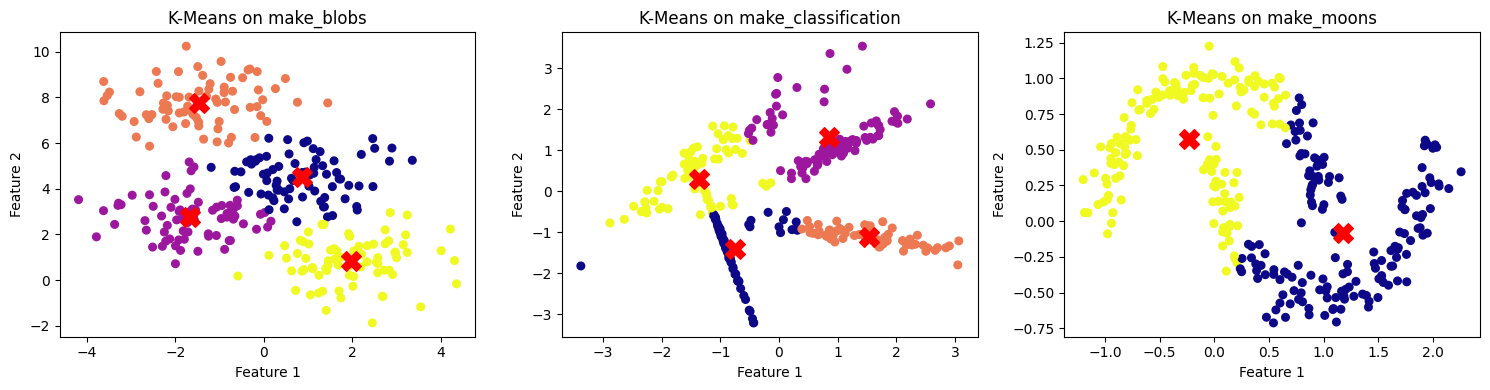

Inertia (make_blobs): 541.0706032599595
Inertia (make_classification): 219.4885201113706
Inertia (make_moons): 124.59578695729931


In [8]:
n_samples = 300
n_features = 2
n_clusters = 4
random_state =0

X_blobs, y_blobs = make_blobs(
    n_samples=n_samples,
    centers=n_clusters,
    n_features=n_features,
    cluster_std=1.0,
    random_state=random_state
)

X_class, y_class = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=n_clusters,
    random_state=random_state
)

X_moons, y_moons = make_moons(
    n_samples=n_samples,
    noise=0.1,
    random_state=random_state
)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='plasma', s=30)
axes[0].set_title("make_blobs (Unclustered)")

axes[1].scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='plasma', s=30)
axes[1].set_title("make_classification  (Unclustered)")

axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='plasma', s=30)
axes[2].set_title("make_moons  (Unclustered)")

for ax in axes:
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

kmeans_blobs = KMeans(n_clusters=n_clusters, random_state=random_state)
labels_blobs = kmeans_blobs.fit_predict(X_blobs)

kmeans_class = KMeans(n_clusters=n_clusters, random_state=random_state)
labels_class = kmeans_class.fit_predict(X_class)

kmeans_moons = KMeans(n_clusters=2, random_state=random_state)
labels_moons = kmeans_moons.fit_predict(X_moons)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_blobs, cmap='plasma', s=30)
axes[0].scatter(kmeans_blobs.cluster_centers_[:, 0], kmeans_blobs.cluster_centers_[:, 1],c='red', s=200, marker='X')
axes[0].set_title("K-Means on make_blobs")

axes[1].scatter(X_class[:, 0], X_class[:, 1], c=labels_class, cmap='plasma', s=30)
axes[1].scatter(kmeans_class.cluster_centers_[:, 0], kmeans_class.cluster_centers_[:, 1],c='red', s=200, marker='X')
axes[1].set_title("K-Means on make_classification")

axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='plasma', s=30)
axes[2].scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1],c='red', s=200, marker='X')
axes[2].set_title("K-Means on make_moons")

for ax in axes:
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

print("Inertia (make_blobs):", kmeans_blobs.inertia_)
print("Inertia (make_classification):", kmeans_class.inertia_)
print("Inertia (make_moons):", kmeans_moons.inertia_)
